# Исследование объявлений о продаже квартир

## Содержание <a id='content'></a>
1. [Загрузка и изучение данных](#viewing) 
2. [Предобработка данных](#processing)
3. [Добавление в таблицу необходимых параметров](#addiction)
4. [Исследовательский анализ данных](#eda)
5. [Общий вывод](#conclusion)

## 1. Загрузка и изучение данных <a id='viweing'></a>

In [1]:
# импортируем нужные нам библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import warnings

In [2]:
# игнорирование предупреждений, которые возникают при построении графиков
warnings.filterwarnings('ignore')

Для удобства сохраним исходную таблицу в переменную df, чтобы быстро и безошибочно к ней обращаться. Остальным переменным будем давать осмысленные имена

In [3]:
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

In [4]:
# выведем первые 5 строк таблицы
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [5]:
# сделаем отображение всех колонок таблицы
pd.options.display.max_columns = None

In [6]:
# укажем ограничеие в 2 знака после запятой для формата float
pd.options.display.float_format = '{:,.2f}'.format

Напечатаем общую информацию о таблице, а так же по данным в ней. Для этого воспользуемся методами **info()** и **describe()**.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

In [8]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,"23,699.00","23,699.00","23,699.00","23,699.00","14,504.00","23,613.00","21,796.00","23,699.00","21,421.00","12,180.00","18,157.00","18,180.00","18,181.00","8,079.00","18,181.00","9,110.00","20,518.00"
mean,9.86,"6,541,548.77",60.35,2.07,2.77,10.67,34.46,5.89,10.57,1.15,"28,793.67","14,191.28",0.61,490.80,0.77,517.98,180.89
std,5.68,"10,887,013.27",35.65,1.08,1.26,6.60,22.03,4.89,5.91,1.07,"12,630.88","8,608.39",0.80,342.32,0.94,277.72,219.73
min,0.00,"12,190.00",12.00,0.00,1.00,1.00,2.00,1.00,1.30,0.00,0.00,181.00,0.00,1.00,0.00,13.00,1.00
25%,6.00,"3,400,000.00",40.00,1.00,2.52,5.00,18.60,2.00,7.00,0.00,"18,585.00","9,238.00",0.00,288.00,0.00,294.00,45.00
50%,9.00,"4,650,000.00",52.00,2.00,2.65,9.00,30.00,4.00,9.10,1.00,"26,726.00","13,098.50",0.00,455.00,1.00,502.00,95.00
75%,14.00,"6,800,000.00",69.90,3.00,2.80,16.00,42.30,8.00,12.00,2.00,"37,273.00","16,293.00",1.00,612.00,1.00,729.00,232.00
max,50.00,"763,000,000.00",900.00,19.00,100.00,60.00,409.70,33.00,112.00,5.00,"84,869.00","65,968.00",3.00,"3,190.00",3.00,"1,344.00","1,580.00"


### Вывод

При первом просмотре таблицы можно заметить следующие недоработки:
1. Имеются пропуски практически в 2/3 столбцах;
2. Столбец с датой имеет строковый тип, is_apartment требует перевода в bool;
3. Столбцы last_price, floors_total, balcony, и все последующие, начиная с parks_around3000, нужно перевести в целочисленный тип;
4. В некоторых столбцах присутстует существенный разброс данных, что означает наличие в них выбросов. 
    
Пропуски в данных могли возникнуть как случайно, так и неслучайно. Например, высота потолка, жилая площадь и площадь кухни заполнялись рекламодателем, отсутствие этих параметров связано с незаполнением соответствующих пунктов при написании объявления. Расстояния до центра города, аэропортов, водоемов, парков и информация об их количестве получены автоматически и пропуски могут быть связаны с тем, что на этой местности картографические исследования не проводились, а значит пропуски неслучайны. Для некоторых значений наиболее верным способом заполнения можем послужить медиана, где-то логическое заполнение окажется наиболее подходящим, а какие-то лучше оставить без изменений, чтобы избежать искажения данных.

## 2. Предобработка данных <a id='processing'></a>
[Назад к оглавлению](#content)

На данном этапе будем просматривать пропущенные значения в столбцах и принимать решение о необходимости их заполнения, чтобы минимизировать искажения данных. После этого приведем все столбцы к нужному нам типу данных и предположим причины появления пропусков.

In [9]:
# напечатаем срез таблицы с пропущенными значениями кол-ва этажей в доме
df[df['floors_total'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
186,12,"11,640,000.00",65.20,2018-10-02T00:00:00,2,nan,nan,30.80,4,NaN,False,False,12.00,nan,Санкт-Петербург,"39,197.00","12,373.00",1.00,123.00,0.00,nan,49.00
237,4,"2,438,033.00",28.10,2016-11-23T00:00:00,1,nan,nan,20.75,1,NaN,False,False,nan,0.00,Санкт-Петербург,"22,041.00","17,369.00",0.00,nan,1.00,374.00,251.00
457,4,"9,788,348.00",70.80,2015-08-01T00:00:00,2,nan,nan,38.40,12,NaN,False,False,10.63,0.00,Санкт-Петербург,"37,364.00","8,322.00",2.00,309.00,2.00,706.00,727.00
671,4,"6,051,191.00",93.60,2017-04-06T00:00:00,3,nan,nan,47.10,8,NaN,False,False,16.80,0.00,Санкт-Петербург,"22,041.00","17,369.00",0.00,nan,1.00,374.00,123.00
1757,5,"3,600,000.00",39.00,2017-04-22T00:00:00,1,nan,nan,nan,9,NaN,False,False,nan,0.00,Санкт-Петербург,"22,735.00","11,618.00",1.00,835.00,1.00,652.00,77.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22542,5,"8,500,000.00",63.50,2017-05-24T00:00:00,2,2.80,nan,nan,3,NaN,False,False,nan,nan,Санкт-Петербург,"51,340.00","15,363.00",0.00,nan,1.00,853.00,512.00
22656,4,"4,574,160.00",64.50,2017-04-02T00:00:00,2,nan,nan,31.70,20,NaN,False,False,14.40,0.00,Санкт-Петербург,"22,041.00","17,369.00",0.00,nan,1.00,374.00,127.00
22808,0,"14,569,263.00",110.40,2016-11-20T00:00:00,3,nan,nan,45.38,6,NaN,False,False,23.42,0.00,Санкт-Петербург,"19,095.00","4,529.00",0.00,nan,0.00,nan,260.00
23590,0,"21,187,872.00",123.30,2017-04-25T00:00:00,3,nan,nan,50.40,18,NaN,False,False,23.60,0.00,Санкт-Петербург,"19,095.00","4,529.00",0.00,nan,0.00,nan,104.00


In [10]:
# количество строк с пропусками
df['floors_total'].isna().sum()

86

In [11]:
df['floors_total'].describe()

count   23,613.00
mean        10.67
std          6.60
min          1.00
25%          5.00
50%          9.00
75%         16.00
max         60.00
Name: floors_total, dtype: float64

Для столбца **floors_total** общее количество пропусков не превышает 0,3%, поэтому можем заменить их медианой (выбивающееся значение в 60 этажей также имеет место быть) без опаски за искажение данных.  
Так как некоторые значения в столбце **floor** превышают значение медианы, то в этих случаях установим этажность дома, равную указанному этажу.

In [12]:
df['floors_total'].fillna(df['floors_total'].median(), inplace=True)

In [13]:
# делаем этажность дома равную указанному этажу для случаев, когда этаж выше 9
df.loc[df['floors_total'] < df['floor'], 'floors_total'] = df.loc[df['floors_total'] < df['floor'], 'floor']

In [14]:
# проверяем
df['floors_total'].isna().sum()

0

In [15]:
# выведем описательную статистику для столбца с высотой потолка методом describe()
df.ceiling_height.describe()

count   14,504.00
mean         2.77
std          1.26
min          1.00
25%          2.52
50%          2.65
75%          2.80
max        100.00
Name: ceiling_height, dtype: float64

Сразу можем увидеть, что минимальные и максимальные значения здесь артефактные, информация о них нам понадобится на следующих этапах работы.
В данном случае следует использовать значение медианы для заполнения пропусков, так как среднее искажается за счет выбросов.  

Так как типовые дома, как правило, обладают схожими характеристиками, для заполнении пропусков в этом столбце будем использовать медианные значения для сгруппированных по количеству этажей объектов. Для этого применим лямбда-функцию.

In [16]:
floors_total_grouped = df.groupby('floors_total')

In [17]:
df['ceiling_height'] = floors_total_grouped['ceiling_height'].apply(lambda row: row.fillna(row.median()))

In [18]:
# проверяем
df['ceiling_height'].isna().sum()

1

Осталось одно незаполненное значение:

In [19]:
df.query('ceiling_height.isna()')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
11575,9,"9,900,000.00",101.00,2016-04-28T00:00:00,3,nan,33.00,53.00,32,False,False,False,21.00,0.00,Санкт-Петербург,"18,732.00","20,444.00",0.00,nan,3.00,80.00,53.00


Так как мы делали группировку по количеству этажей, в нашем наборе данных присутствовала только одна квартира, расположенная на 33-м, и для нее отсутствовало какое-либо медианное значение. Заполним его медианой по всем данным.

In [20]:
df['ceiling_height'].fillna(df['ceiling_height'].median(), inplace=True)

Далее выведем срез данных квартир, где не указано **число балконов**.

In [21]:
df.query('balcony.isna()').head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,"13,000,000.00",108.00,2019-03-07T00:00:00,3,2.70,16.00,51.00,8,NaN,False,False,25.00,nan,Санкт-Петербург,"18,863.00","16,028.00",1.00,482.00,2.00,755.00,nan
4,2,"10,000,000.00",100.00,2018-06-19T00:00:00,2,3.03,14.00,32.00,13,NaN,False,False,41.00,nan,Санкт-Петербург,"31,856.00","8,098.00",2.00,112.00,1.00,48.00,121.00
5,10,"2,890,000.00",30.40,2018-09-10T00:00:00,1,2.65,12.00,14.40,5,NaN,False,False,9.10,nan,городской посёлок Янино-1,nan,nan,nan,nan,nan,nan,55.00
8,20,"2,900,000.00",33.16,2018-05-23T00:00:00,1,2.70,27.00,15.43,26,NaN,False,False,8.81,nan,посёлок Мурино,nan,nan,nan,nan,nan,nan,189.00
10,5,"5,050,000.00",39.60,2017-11-16T00:00:00,1,2.67,12.00,20.30,3,NaN,False,False,8.50,nan,Санкт-Петербург,"38,357.00","13,878.00",1.00,310.00,2.00,553.00,137.00


Скорее всего количество балконов не указано в тех случаях, когда их нет, поэтому можем провести логическую замену пропусков на 0.

In [22]:
df.balcony.fillna(0, inplace=True)

Для заполнения пропусков в **жилой площади** и **площади кухни** будем использовать медианные значения для количества комнат. В зависимости этих параметров мы можем убедиться, если построим матрицу корреляции:

In [23]:
df[['rooms', 'living_area', 'kitchen_area']].corr()

,rooms,living_area,kitchen_area
rooms,1.00,0.85,0.27
living_area,0.85,1.00,0.43
kitchen_area,0.27,0.43,1.00


Существует явная линейная зависимость жилой площади от количества комнат. Площадь кухни в свою очередь зависит от жилой.

In [24]:
# выведем медианы жилой площади для каждого количества комнат в доме
df.groupby('rooms')['living_area'].median()

rooms
0     18.00
1     17.60
2     30.50
3     45.00
4     63.60
5     91.78
6    123.90
7    145.00
8    161.00
9    179.20
10   161.40
11   133.90
12   409.70
14   195.15
15   409.00
16   180.00
19   264.50
Name: living_area, dtype: float64

In [25]:
# то же самое для площади кухни
df.groupby('rooms')['kitchen_area'].median()

rooms
0       nan
1      9.04
2      8.80
3      9.50
4     11.10
5     15.10
6     19.50
7     20.00
8     25.00
9     14.30
10    19.80
11    12.60
12   112.00
14    21.25
15   100.00
16    13.00
19    27.60
Name: kitchen_area, dtype: float64

In [26]:
# сохраняем сруппированную по комнатам таблицу в новую переменую
rooms_grouped = df.groupby('rooms')

In [27]:
# при помощи лямбда-функции заполняем пропуски медианами
df['living_area'] = rooms_grouped['living_area'].apply(lambda row: row.fillna(row.median()))

In [28]:
df['kitchen_area'] = rooms_grouped['kitchen_area'].apply(lambda row: row.fillna(row.median()))

In [29]:
# проверяем
df['living_area'].isna().sum()

0

In [30]:
df['kitchen_area'].isna().sum()

197

После заполнения площади кухни медианами осталось еще 197 неопредленных значений в тех случаях, когда количество комнат равно 0.

In [31]:
df.query('kitchen_area.isna()').sample(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
21299,13,"2,450,000.00",28.50,2017-11-22T00:00:00,0,2.65,12.00,18.00,7,NaN,False,True,nan,2.00,Санкт-Петербург,"20,381.00","19,383.00",0.00,nan,1.00,579.00,73.00
19469,5,"3,000,000.00",24.00,2019-02-22T00:00:00,0,2.75,10.00,18.00,8,NaN,True,False,nan,2.00,Кудрово,nan,nan,nan,nan,nan,nan,12.00
2532,5,"3,500,000.00",27.10,2018-02-01T00:00:00,0,2.70,18.00,18.70,9,NaN,False,True,nan,2.00,Санкт-Петербург,"32,036.00","8,175.00",0.00,nan,1.00,644.00,70.00
1600,11,"2,550,000.00",30.00,2017-11-10T00:00:00,0,2.75,23.00,15.90,11,NaN,True,False,nan,2.00,Санкт-Петербург,"21,928.00","17,256.00",0.00,nan,1.00,429.00,19.00
6805,7,"1,850,000.00",31.00,2017-11-10T00:00:00,0,2.70,18.00,18.00,10,NaN,False,True,nan,1.00,Никольское,nan,nan,nan,nan,nan,nan,7.00
5290,7,"4,090,000.00",24.00,2017-11-16T00:00:00,0,2.75,24.00,17.60,23,NaN,True,False,nan,2.00,Санкт-Петербург,"7,201.00","13,417.00",1.00,"1,199.00",0.00,nan,58.00
1220,5,"3,300,000.00",27.00,2017-11-10T00:00:00,0,2.80,17.00,20.00,16,NaN,True,False,nan,0.00,Санкт-Петербург,"12,507.00","12,419.00",0.00,nan,1.00,528.00,113.00
508,0,"3,375,000.00",34.40,2017-03-28T00:00:00,0,2.66,26.00,24.30,19,NaN,False,True,nan,1.00,посёлок Парголово,"53,115.00","19,292.00",0.00,nan,1.00,593.00,430.00
7286,6,"2,580,000.00",30.00,2018-02-07T00:00:00,0,2.70,18.00,19.00,2,NaN,False,True,nan,0.00,посёлок Парголово,"52,610.00","18,787.00",0.00,nan,0.00,nan,41.00
15756,4,"3,100,000.00",31.00,2017-09-11T00:00:00,0,2.70,19.00,18.00,9,NaN,True,False,nan,2.00,Санкт-Петербург,"34,279.00","15,447.00",0.00,nan,0.00,nan,61.00


Можно заметить, что это характерно для квартир со свободной планировкой и студий. Для таких помещений сделаем площадь кухни, равную медианному значению для однокомнатных квартир.

In [32]:
df['kitchen_area'].fillna(9.04, inplace=True)

In [33]:
df['kitchen_area'].isna().sum()

0

Данных о том, является ли квартира апартаменами или нет всего немногим больше 10%. Информация об этом в дальнейших исследованиях нам не понадобится, мы можем предположить, что все незаполенные данные указывают на то, что квартира - не апартаменты.

In [34]:
# для удобства заменим булевы значения на 0 и 1 путем домножения на 1
df['is_apartment'] = df['is_apartment'] * 1

In [35]:
# True это 1, False - 0, заполним пропуски нулями
df['is_apartment'].fillna(0, inplace=True)

In [36]:
# проверяем
df['is_apartment'].isna().sum()

0

Пропущенные значения в столбцах с **расстояниями до центра города и аэропорта** можно также заменить медианной, характерной для каждого населенного пункта. Мы можем сделать это ввиду того, что в Ленинградской области находится только один аэропорт - Пулково, которых располагается примерно в центре области. Та же логика и для центра Санкт-Петербурга. 

In [37]:
df['cityCenters_nearest'].fillna(df['cityCenters_nearest'].median(), inplace=True)

In [38]:
df['airports_nearest'].fillna(df['airports_nearest'].median(), inplace=True)

Обозначим пропуски в картографических данных, для наглядности выведем срез таблицы с пропущенными значениями в столбце **ponds_around3000**.

In [39]:
df.query('parks_around3000.isna()')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
5,10,"2,890,000.00",30.40,2018-09-10T00:00:00,1,2.65,12.00,14.40,5,0,False,False,9.10,0.00,городской посёлок Янино-1,"26,726.00","13,098.50",nan,nan,nan,nan,55.00
8,20,"2,900,000.00",33.16,2018-05-23T00:00:00,1,2.70,27.00,15.43,26,0,False,False,8.81,0.00,посёлок Мурино,"26,726.00","13,098.50",nan,nan,nan,nan,189.00
12,10,"3,890,000.00",54.00,2016-06-30T00:00:00,2,2.55,5.00,30.00,5,0,False,False,9.00,0.00,Сертолово,"26,726.00","13,098.50",nan,nan,nan,nan,90.00
22,20,"5,000,000.00",58.00,2017-04-24T00:00:00,2,2.75,25.00,30.00,15,0,False,False,11.00,2.00,деревня Кудрово,"26,726.00","13,098.50",nan,nan,nan,nan,60.00
30,12,"2,200,000.00",32.80,2018-02-19T00:00:00,1,2.55,9.00,17.60,2,0,False,False,9.04,0.00,Коммунар,"26,726.00","13,098.50",nan,nan,nan,nan,63.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23683,16,"2,100,000.00",62.80,2018-09-18T00:00:00,4,2.50,5.00,45.50,3,0,False,False,5.50,0.00,посёлок Дзержинского,"26,726.00","13,098.50",nan,nan,nan,nan,nan
23692,2,"1,350,000.00",30.00,2017-07-07T00:00:00,1,2.55,5.00,17.50,4,0,False,False,6.00,0.00,Тихвин,"26,726.00","13,098.50",nan,nan,nan,nan,413.00
23695,14,"3,100,000.00",59.00,2018-01-15T00:00:00,3,2.55,5.00,38.00,4,0,False,False,8.50,0.00,Тосно,"26,726.00","13,098.50",nan,nan,nan,nan,45.00
23696,18,"2,500,000.00",56.70,2018-02-11T00:00:00,2,2.80,3.00,29.70,1,0,False,False,8.80,0.00,село Рождествено,"26,726.00","13,098.50",nan,nan,nan,nan,nan


Во избежании искажения данных здесь так же стоит оставить пропущенные значения, для дальнейших исследований они нам не понадобятся.

In [40]:
df['locality_name'].fillna('Нет данных', inplace=True)

Пропуски в столбце **days_exposition** могут указывать на то, что на момент исследования квартира еще не продана. При исследовании квартир по этому показателю будем учитывать только проданные квартиры, поэтому также для избежания искажений по этому параметру оставим пропущенные значения незаполненными.

Теперь все нужные нам для дальнейшего исследования столбцы заполнены и некоторые из них необходимо перевести в другой тип данных.  
Так, столбцы last_price, floors_total, balcony, airports_nearest, cityCenters_nearest преобразуем в целые числа, first_day_exposition - в формат datetime, а is_apartment в bool.

In [41]:
df['last_price'] = df['last_price'].astype('int')
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
df['floors_total'] = df['floors_total'].astype('int')
df['is_apartment'] = df['is_apartment'].astype('bool')
df['balcony'] = df['balcony'].astype('int')
df['airports_nearest'] = df['airports_nearest'].astype('int')
df['cityCenters_nearest'] = df['cityCenters_nearest'].astype('int')

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null int64
total_area              23699 non-null float64
first_day_exposition    23699 non-null datetime64[ns]
rooms                   23699 non-null int64
ceiling_height          23699 non-null float64
floors_total            23699 non-null int64
living_area             23699 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null bool
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            23699 non-null float64
balcony                 23699 non-null int64
locality_name           23699 non-null object
airports_nearest        23699 non-null int64
cityCenters_nearest     23699 non-null int64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around3000  

## 3. Добавление в таблицу необходимых параметров <a id='addiction'></a>
[Назад к оглавлению](#content)

На следующем этапе необходимо добавить в таблицу данные, которые понадобятся нам для проведения дальнейшего исследовательского анализа.  
Укажем, чему будет равняться стоимость одного квадратного метра для каждого наблюдения, отдельно выделим день недели, месяц и год даты публикации, разделим квартиры на 3 группы в зависимости от этажа, а также найдем соотношения жилой площади и площади кухни к общей.

**Цена квадратного метра:**
Это отношение стоимости квартиры к ее площади.

In [43]:
df['price_per_m2'] = (df['last_price'] / df['total_area']).astype('int')

**День недели, месяц и год публикации объявления:**  
Здесь применим соответственно методы **weekday, month, year**.

In [44]:
df['weekday'] = df['first_day_exposition'].dt.weekday

In [45]:
df['month'] = df['first_day_exposition'].dt.month

In [46]:
df['year'] = df['first_day_exposition'].dt.year

**Этаж квартиры:**  
Варианты — первый, последний, другой.  
Для категоризации по этажу напишем функцию, которая будет возвращать нужну. категорию в зависимости от номера этажа.

In [47]:
def floor_category(row):
    if row['floor'] == 1:
        return 'первый'
    if row['floor'] == row['floors_total']:
        return 'последний'
    return 'другой'

In [48]:
df['floor_category'] = df.apply(floor_category, axis=1)

**Соотношение жилой и общей площади:**

In [49]:
df['living_area_ratio'] = df['living_area'] / df['total_area']

**Соотношение площади кухни к общей:**

In [50]:
df['kitchen_area_ratio'] = df['kitchen_area'] / df['total_area']

In [51]:
# проверяем полученную обновленную таблицу
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_m2,weekday,month,year,floor_category,living_area_ratio,kitchen_area_ratio
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.00,8,False,False,False,25.00,0,Санкт-Петербург,18863,16028,1.00,482.00,2.00,755.00,nan,120370,3,3,2019,другой,0.47,0.23
1,7,3350000,40.40,2018-12-04,1,2.75,11,18.60,1,False,False,False,11.00,2,посёлок Шушары,12817,18603,0.00,nan,0.00,nan,81.00,82920,1,12,2018,первый,0.46,0.27
2,10,5196000,56.00,2015-08-20,2,2.55,5,34.30,4,False,False,False,8.30,0,Санкт-Петербург,21741,13933,1.00,90.00,2.00,574.00,558.00,92785,3,8,2015,другой,0.61,0.15
3,0,64900000,159.00,2015-07-24,3,2.60,14,45.00,9,False,False,False,9.50,0,Санкт-Петербург,28098,6800,2.00,84.00,3.00,234.00,424.00,408176,4,7,2015,другой,0.28,0.06
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.00,13,False,False,False,41.00,0,Санкт-Петербург,31856,8098,2.00,112.00,1.00,48.00,121.00,100000,1,6,2018,другой,0.32,0.41


## 4. Исследовательский анализ данных <a id='eda'></a>
[Назад к оглавлению](#content)

Для начала изучим следующие параметры: **площадь, цена, число комнат, высота потолков**.  
Построим гистограммы для каждого параметра.

Сделаем построение гистограмм автоматизированным. Для этого необходимо задать функцию, которая в качестве параметра принимает нужную нам таблицу (здесь она будет исходной). В теле запишем в отдельную переменную список колонок, которые будем исследовать, выведем их описание методом describe и вычислим межквартильный размах IQR. После этого гистограммы будут строиться в диапазоне +-1.5*IQR. 

In [52]:
def hist_constructor(data):
    column_list = data[['total_area', 'price_per_m2', 'last_price', 'rooms', 'ceiling_height']] #список исследуемых столбцов
    describe = column_list.describe() #сохраняем описательную статистику в переменную
    print('Описание данных:')
    display(describe) #вывод описания
    
    for column in column_list:
        q1 = describe[column]['25%'] # 1-й квартиль
        q3 = describe[column]['75%'] # 3-й квартиль
        iqr = q3 - q1 # межквартильный размах
    
        low_range = max(describe[column]['min'], q1 - 1.5 * iqr) # нижний диапазон построения в зависимости что больше - минимум или 1.5 IQR
        high_range = min(describe[column]['max'], q3 + 1.5 * iqr) # # верхний диапазон построения в зависимости что меньше - максимум или 1.5 IQR
    
        data[column].plot(kind='hist', bins=50, range=(low_range, high_range), grid=True) #построение гистограммы
        plt.suptitle(column) # каждая гистограмма будет иметь название соответствующего столбца
        plt.xlabel('Значение параметра') # подпись оси x
        plt.ylabel('Частота') # подпись оси y
        plt.show()

Описание данных:


,total_area,price_per_m2,last_price,rooms,ceiling_height
count,"23,699.00","23,699.00","23,699.00","23,699.00","23,699.00"
mean,60.35,"99,421.21","6,541,548.77",2.07,2.74
std,35.65,"50,306.81","10,887,013.27",1.08,0.99
min,12.00,111.00,"12,190.00",0.00,1.00
25%,40.00,"76,585.00","3,400,000.00",1.00,2.55
50%,52.00,"95,000.00","4,650,000.00",2.00,2.65
75%,69.90,"114,256.00","6,800,000.00",3.00,2.75
max,900.00,"1,907,500.00","763,000,000.00",19.00,100.00


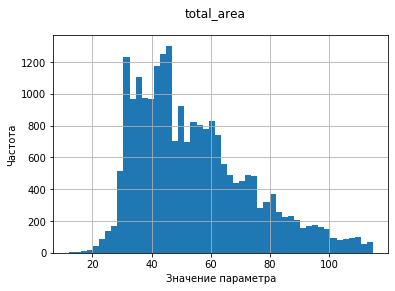

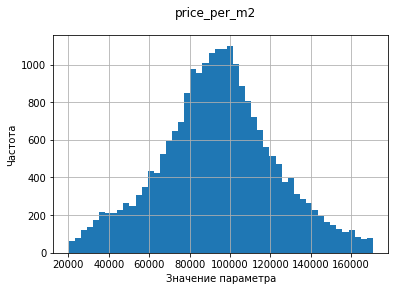

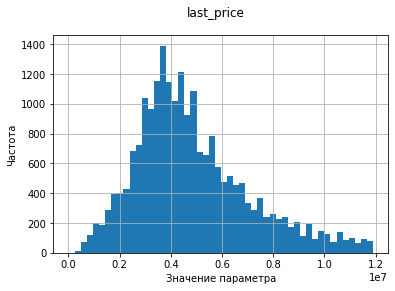

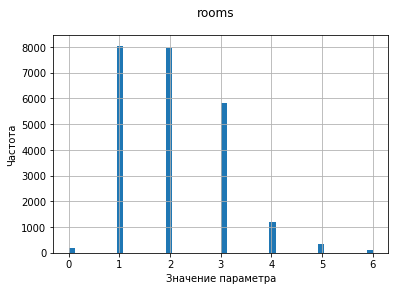

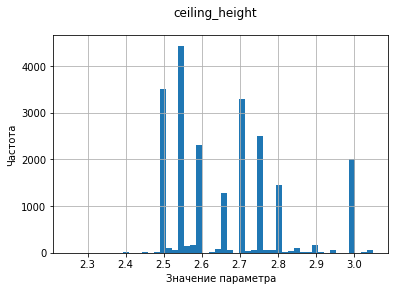

In [53]:
hist_constructor(df)

#### По построенным гистограммам можно сделать следующие выводы:
1. Наибольшее число квартир в выборке имеют **площадь** от 30 до 60 кв.м, примерно 1300 объектов недвижимости представлены площадью около 45 кв.м. После 60 количество квартир идет на убыль. Также есть единичные предложения площадью менее 200 кв.м.
2. Гистограмма **цены за квадратный метр** имеет ярко выраженное нормальное распределение. Пик значение приходится на 80-110 тыс. - с такими расценками представлено порядка 10000 квартир.
3. **Общая стоимость** квартир в основном составляет 3-6 млн. Есть и очень дешевые объекты менее 1 млн - их представлено более двухста.
4. **Количество комнат** в продаваемых квартирах как правило 1, 2 или 3 - около 90%. При этом трёхкомнатные немного уступают, их на 2 тысячи меньше остальных самых популярных.
5. **Высота потолков** чаще всего колеблется от 2.5 до 2.8 м, так же встречается немало квартир с потолками в 3 м. Больше 4000 объектов имеют высоту 2.55 м.

Теперь изучим **время продажи квартиры** и построим гистограмму.

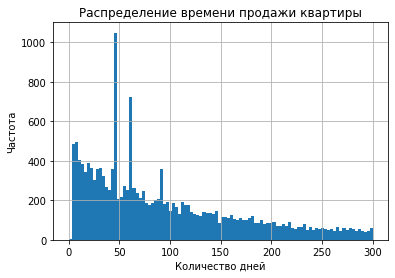

In [83]:
# гистрограмма с диапазоном до 300 дней
df.hist('days_exposition', bins=100, range=(0, 300))
plt.title('Распределение времени продажи квартиры')
plt.xlabel('Количество дней')
plt.ylabel('Частота')
plt.show()

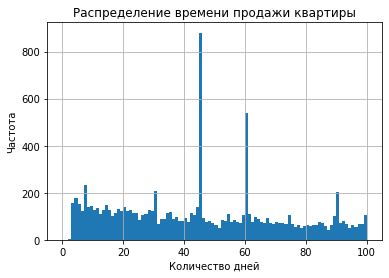

In [84]:
# гистрограмма с диапазоном до 100 дней
df.hist('days_exposition', bins=100, range=(0, 100))
plt.title('Распределение времени продажи квартиры')
plt.xlabel('Количество дней')
plt.ylabel('Частота')
plt.show()

Также выведем описательную статистику для данного праметра и выделим **среднее значение и медиану**.

In [56]:
df['days_exposition'].describe()

count   20,518.00
mean       180.89
std        219.73
min          1.00
25%         45.00
50%         95.00
75%        232.00
max      1,580.00
Name: days_exposition, dtype: float64

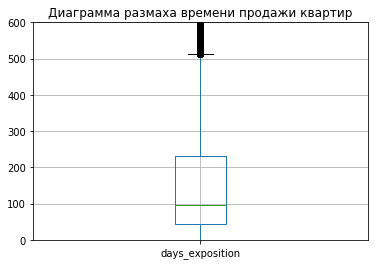

In [85]:
plt.ylim(0, 600)
df.boxplot('days_exposition')
plt.title('Диаграмма размаха времени продажи квартир')
plt.show()

На гистограмме наблюдаются ярко выраженные пики в районе примерно 45 и 60 дней: на этих отрезках было продано более 1000 и 700 квартир соответственно.  
В целом распределение похоже на распределение Пуассона, указывающее количество событий в единицу времени, однако, как видно из гистограммы и статистики, присутсвует много аномально быстрых и долгих продаж.  
Обычно продажа квартиры занимает от 1 до 3 месяцев - на этих сроках в гистрограмме так же присутствуют скачки в 200 объектов.  
Минимальная продажа прошла всего за день - это значение подозрительно. Все сделки, которые закрылись за несколько дней считаем аномально быстрыми.  
Среднее значение в 2 раза превышает значение медианы, что означает длинный "хвост" - много объектов недвижимости продаются очень долго. Будем считать такими квартиры со временем продажи больше 500 дней - по диаграмме размаха далее начинаются выбросы.

**Редкие и выбивающиеся значения.**

На этом этапе нам нужно отфильтровать таблицу, исключив из нее редкие и выбивающиеся значения изученных ранее параметров: площадь, цена, число комнат, высота потолков. отфильтрованная таблица будет находиться в новой переменной df_filtered.

In [58]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_m2,weekday,month,year,living_area_ratio,kitchen_area_ratio
count,"23,699.00","23,699.00","23,699.00","23,699.00","23,699.00","23,699.00","23,699.00","23,699.00","23,699.00","23,699.00","23,699.00","23,699.00","18,181.00","8,079.00","18,181.00","9,110.00","20,518.00","23,699.00","23,699.00","23,699.00","23,699.00","23,699.00","23,699.00"
mean,9.86,"6,541,548.77",60.35,2.07,2.74,10.68,34.32,5.89,10.45,0.59,"28,310.15","13,936.68",0.61,490.80,0.77,517.98,180.89,"99,421.21",2.57,6.40,"2,017.37",0.56,0.19
std,5.68,"10,887,013.27",35.65,1.08,0.99,6.59,21.70,4.89,5.64,0.96,"11,090.33","7,553.79",0.80,342.32,0.94,277.72,219.73,"50,306.81",1.79,3.49,1.04,0.11,0.08
min,0.00,"12,190.00",12.00,0.00,1.00,1.00,2.00,1.00,1.30,0.00,0.00,181.00,0.00,1.00,0.00,13.00,1.00,111.00,0.00,1.00,"2,014.00",0.02,0.02
25%,6.00,"3,400,000.00",40.00,1.00,2.55,5.00,18.40,2.00,7.40,0.00,"21,183.00","10,927.00",0.00,288.00,0.00,294.00,45.00,"76,585.00",1.00,3.00,"2,017.00",0.49,0.13
50%,9.00,"4,650,000.00",52.00,2.00,2.65,9.00,30.30,4.00,9.04,0.00,"26,726.00","13,098.00",0.00,455.00,1.00,502.00,95.00,"95,000.00",3.00,6.00,"2,017.00",0.57,0.17
75%,14.00,"6,800,000.00",69.90,3.00,2.75,16.00,42.70,8.00,11.50,1.00,"34,327.00","15,248.50",1.00,612.00,1.00,729.00,232.00,"114,256.00",4.00,10.00,"2,018.00",0.64,0.23
max,50.00,"763,000,000.00",900.00,19.00,100.00,60.00,409.70,33.00,112.00,5.00,"84,869.00","65,968.00",3.00,"3,190.00",3.00,"1,344.00","1,580.00","1,907,500.00",6.00,12.00,"2,019.00",1.51,0.79


Напишем функцию, которая будет автоматически фильтровать полученный в ее параметр столбец. В ней мы выделим 1-й и 3-й квартели, посчитаем межквартильный размах и оставим те значения, которые будут входить в полтора IQR. Если эти значения окажутся меньше минимума или больше максимума, то будут браться крайние значения. На выходе получим новую таблицу, отфильтрованную по заданной колонке.

In [59]:
def data_filter(data, column): 
    describe = data[[column]].describe()
    q1 = describe[column]['25%'] # 1-й квартиль
    q3 = describe[column]['75%'] # 3-й квартиль
    iqr = q3 - q1 # межквартильный размах
    low_range = max(describe[column]['min'], (q1 - 1.5 * iqr))
    high_range = min(describe[column]['max'], (q3 + 1.5 * iqr))
    df_filtered = data.query('@low_range <= {} <= @high_range'.format(column))
    return df_filtered

Применим функцию в цикле для интересующих нас колонок.

In [60]:
df_filtered = data_filter(df, 'total_area')
for column in ['price_per_m2', 'rooms', 'ceiling_height']:
    df_filtered = data_filter(df_filtered, column)

In [61]:
df_filtered.reset_index(inplace=True)

In [62]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20694 entries, 0 to 20693
Data columns (total 30 columns):
index                   20694 non-null int64
total_images            20694 non-null int64
last_price              20694 non-null int64
total_area              20694 non-null float64
first_day_exposition    20694 non-null datetime64[ns]
rooms                   20694 non-null int64
ceiling_height          20694 non-null float64
floors_total            20694 non-null int64
living_area             20694 non-null float64
floor                   20694 non-null int64
is_apartment            20694 non-null bool
studio                  20694 non-null bool
open_plan               20694 non-null bool
kitchen_area            20694 non-null float64
balcony                 20694 non-null int64
locality_name           20694 non-null object
airports_nearest        20694 non-null int64
cityCenters_nearest     20694 non-null int64
parks_around3000        15478 non-null float64
parks_nearest      

Построим график boxplot для визуализации структуры необходимых столбцов:

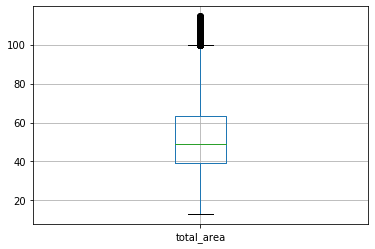

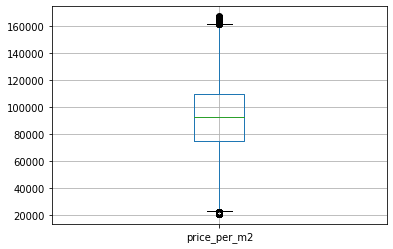

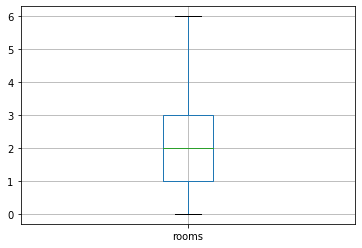

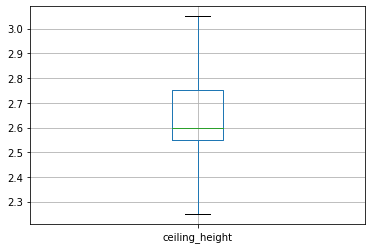

In [63]:
for column in ['total_area', 'price_per_m2', 'rooms', 'ceiling_height']:
    df_filtered.boxplot(column)
    plt.show()

После удаления редких и выбивающихся значений исходная таблица сократилась на 17%.

Узнаем какие факторы больше всего влияют на стоимость квартиры. Для этого посмотрим, зависит ли цена от площади, числа комнат, удалённости от центра.  
Изучим зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом.  
Также изучим зависимость от даты размещения: дня недели, месяца и года.

Напишем функцию, которая в качестве параметра будет принимать таблицу с данными, а возвращать **матрицу корреляции** для интересующих нас столбцов:

In [64]:
def data_corr(data):
    return data[
        ['price_per_m2',
         'last_price',
         'total_area', 
         'rooms', 
         'cityCenters_nearest', 
         'floor_category', 
         'weekday', 
         'month', 
         'year']
        ].corr()

In [65]:
data_corr(df_filtered)

,price_per_m2,last_price,total_area,rooms,cityCenters_nearest,weekday,month,year
price_per_m2,1.00,0.64,0.01,-0.18,-0.19,-0.01,-0.00,0.07
last_price,0.64,1.00,0.75,0.46,-0.20,-0.01,0.01,-0.00
total_area,0.01,0.75,1.00,0.80,-0.10,-0.00,0.01,-0.06
rooms,-0.18,0.46,0.80,1.00,-0.06,0.00,-0.00,-0.03
cityCenters_nearest,-0.19,-0.20,-0.10,-0.06,1.00,0.00,-0.01,0.01
weekday,-0.01,-0.01,-0.00,0.00,0.00,1.00,0.01,-0.01
month,-0.00,0.01,0.01,-0.00,-0.01,0.01,1.00,-0.27
year,0.07,-0.00,-0.06,-0.03,0.01,-0.01,-0.27,1.00


Матрица корреляции не показывает ярковыраженных зависимостей цены от изучаемых нами параметров, помимо общей стоимости квартиры, что вполне очевидно. Очень маловероятно, что их на самом деле нет, скорее это означает, что зависимости носят нелинейный характер.  
Чтобы в этом убедиться, посмтроим графики по каждому параметру. Сделаем этот процесс автоматизированным: напишем функцию, которая на вход будет принимать таблицу и строить наиболее информативный для нас график в зависимости от исследуемого параметра.

In [66]:
def plot_constructor(data):
    data.plot(x='total_area', y='price_per_m2', kind='hexbin', gridsize=30, figsize=(10, 6), sharex=False, grid=True)
    plt.suptitle('Зависимость стоимости за кв.м от площади')

    (data
         .pivot_table(index='rooms', values='price_per_m2')
         .plot(grid=True, style='o-', ylim=(50000, 170000), figsize=(10, 4))
    )
    plt.suptitle('Зависимость стоимости за кв.м от количества комнат')
    
    data.plot(kind='scatter', x='cityCenters_nearest', y='price_per_m2', alpha=0.1)
    
    data.boxplot(column='price_per_m2', by='floor_category')
    plt.show()
    
    for column in ['weekday', 'month', 'year']:
        (data
             .pivot_table(index=column, values='price_per_m2')
             .sort_values(by=column)
             .plot(grid=True, figsize=(8, 4), style='o-')
        )

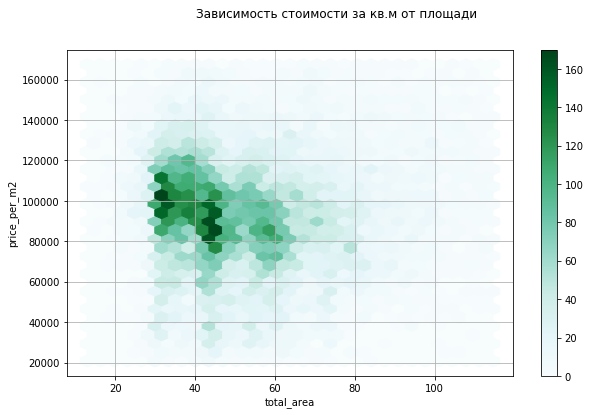

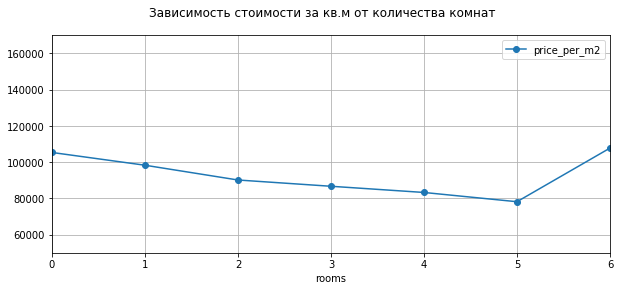

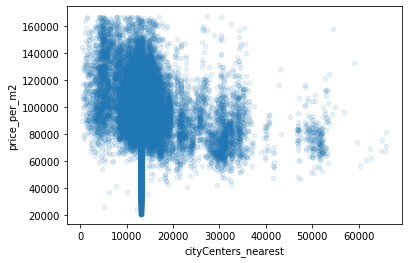

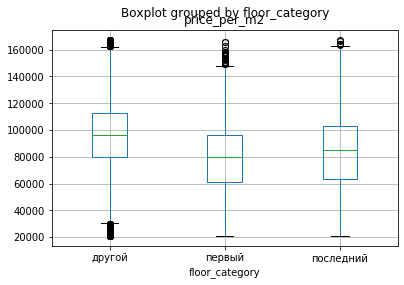

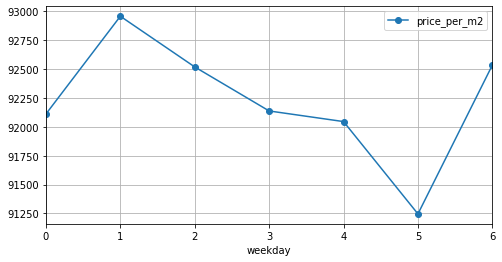

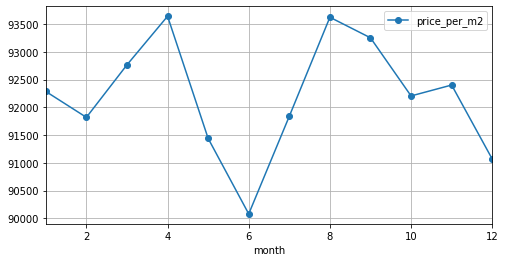

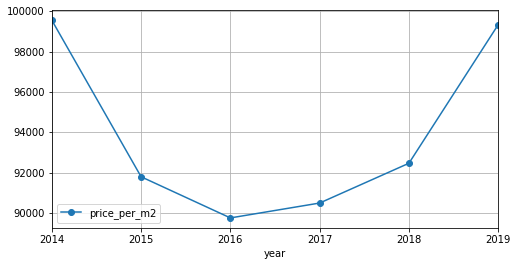

In [67]:
plot_constructor(df_filtered)

1. В наиболе пулярных по **метражу** квартирах заметна тенденция к снижению цены за квадратный метр: если для 30 разброс примерно 80-120 тыс, то для 60 уже 80-100.
2. При увеличении **количества комнат** так же цена за кв.м линейно уменьшается, Однако затем идет скачок для 6-комнатных квартир, который повлиял на корреляцию, при этом таких квартир в нашей выборке всего 5. 
3. Снижение цены наблюдается и при удалении от **центра города**. Здесь диаграмма рассеяния показывает наибольшую плотность квартир на расстоянии от 8 до 20 км, цена в этих квартирах варьируется от 60 до 150 тыс за кв.м. Также есть немало предложений в удаленности на 30 и 50 км от Санкт-Петербурга.
4. В зависимости от **категории этажа** распределение цен расположилось следующим образом: первый и последний этажи имеют более низкую цену, при этом квартира на последнем этаже в среднем обойдется чуть дороже, чем на первом.
5. Если рассматривать стоимость в зависимости от **дня недели**, то самые дешевые предложения появляются в субботу -  менее 91 тыс/м2. примерно одинаковую стоимость - около 92 тыс. - имеют объявления, выставленные во вторник, среду и воскресенье и являются наиболее дорогими. Снижение цены в зависимости от **месяца** видно в июне. Почти одинаковую и самую высокую стоимость можно наблюдать в апреле и августе - более 93 тыс. в среднем. Стойкое снижение цены видно до 2016 **года**, после которого она вновь начала возрастать, с 2018 по 2019 это возрастание оказалось наиболее заметным - средняя цена выросла более чем на 6 тыс за квадрат.

Теперь мы выберем 10 населённых пунктов с наибольшим числом объявлений и посчитаем среднюю цену квадратного метра в этих населённых пунктах. После этого выделим среди них населённые пункты с самой высокой и низкой стоимостью жилья.

In [68]:
top10_locality = (df_filtered
                  .groupby('locality_name')
                  .agg({'total_area':'count', 'price_per_m2':'mean'})
                  .sort_values(by='total_area', ascending=False)
                  .rename({'total_area':'count', 'price_per_m2':'mean_price'}, axis=1)
                  .head(10)
                 )
top10_locality

,count,mean_price
locality_name,,
Санкт-Петербург,13127,"105,247.44"
посёлок Мурино,520,"85,724.78"
посёлок Шушары,436,"78,682.08"
Всеволожск,390,"67,161.22"
Пушкин,333,"101,582.40"
посёлок Парголово,326,"90,331.84"
Колпино,326,"75,412.84"
деревня Кудрово,298,"92,409.27"
Гатчина,297,"69,232.57"


Построим график средней цены для этих населенных пунктов. Для удобства отсортируем их по убыванию средней цены.

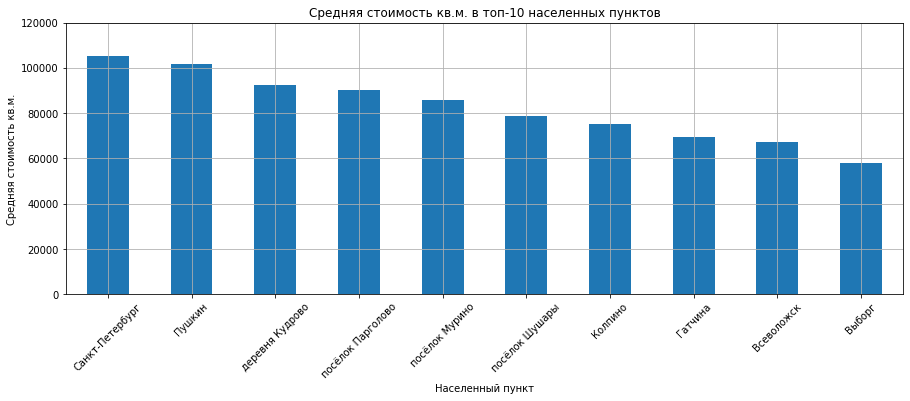

In [86]:
(top10_locality
 .sort_values(by='mean_price', ascending=False)['mean_price']
 .plot(kind='bar', figsize=(15, 5), ylim=(0, 120000), grid=True)
)
plt.xticks(rotation=45)
plt.title('Средняя стоимость кв.м. в топ-10 населенных пунктов')
plt.xlabel('Населенный пункт')
plt.ylabel('Средняя стоимость кв.м.')
plt.show()

Как и можно было предположить, Питер имеет самую высокую среднюю цену - более 100 тыс за квадрат. Выборг же замыкает топ-10 городов со стоимостью в 60 тыс.

Теперь наша задача выяснить, какая область входит в центр.  
Создадим столбец с расстоянием до центра в километрах и округлим его до целых значений. После этого посчитаем среднюю цену для каждого километра.  
После этого построим график: он должен показывать, как цена зависит от удалённости от центра. Определим границу, где график сильно меняется — это и будет **центральная зона**.

In [70]:
# срез таблицы с объявлениями в Санкт-Петербурге сохраним в новую переменную
spb_flats = df_filtered.query('locality_name == "Санкт-Петербург"')

In [71]:
# столбец с округленным значением дисстанции до центра в километрах
spb_flats['center_distance'] = (spb_flats['cityCenters_nearest'] / 1000).round().astype(int)

In [72]:
spb_flats.head()

,index,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_m2,weekday,month,year,floor_category,living_area_ratio,kitchen_area_ratio,center_distance
0,0,20,13000000,108.00,2019-03-07,3,2.70,16,51.00,8,False,False,False,25.00,0,Санкт-Петербург,18863,16028,1.00,482.00,2.00,755.00,nan,120370,3,3,2019,другой,0.47,0.23,16
2,2,10,5196000,56.00,2015-08-20,2,2.55,5,34.30,4,False,False,False,8.30,0,Санкт-Петербург,21741,13933,1.00,90.00,2.00,574.00,558.00,92785,3,8,2015,другой,0.61,0.15,14
3,4,2,10000000,100.00,2018-06-19,2,3.03,14,32.00,13,False,False,False,41.00,0,Санкт-Петербург,31856,8098,2.00,112.00,1.00,48.00,121.00,100000,1,6,2018,другой,0.32,0.41,8
6,7,5,7915000,71.60,2019-04-18,2,2.75,24,30.50,22,False,False,False,18.90,2,Санкт-Петербург,23982,11634,0.00,nan,0.00,nan,nan,110544,3,4,2019,другой,0.43,0.26,12
8,9,18,5400000,61.00,2017-02-26,3,2.50,9,43.60,7,False,False,False,6.50,2,Санкт-Петербург,50898,15008,0.00,nan,0.00,nan,289.00,88524,6,2,2017,другой,0.71,0.11,15


Сгруппируем полученную таблицу по расстоянию до центра и построим график по этим значениям.

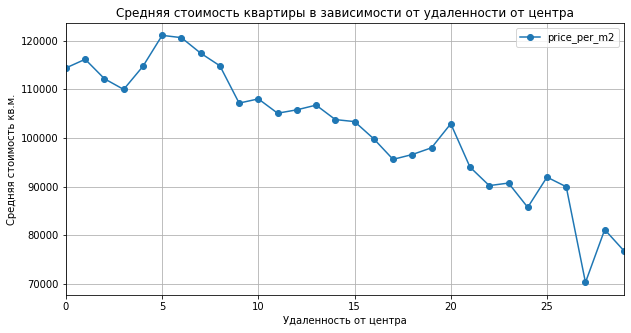

In [88]:
(spb_flats
 .pivot_table(index='center_distance', values='price_per_m2', aggfunc='mean')
 .plot(figsize=(10,5), grid=True, style='o-')
)
plt.title('Средняя стоимость квартиры в зависимости от удаленности от центра')
plt.xlabel('Удаленность от центра')
plt.ylabel('Средняя стоимость кв.м.')
plt.show()

Выделим сегмент квартир в центре. По графику виден перепад стоимости после **8 км** - это и будет пограничное значение для центра города.

По аналогии с исследованием выше проанализируем эту территорию по тем же параметрам: площадь, цена, число комнат, высота потолков. Также выделим факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления).  
Исходя из результатов будем понимать, отличаются ли они от общих выводов по всему городу?

In [74]:
# сохраняем в переменную срез квартир с расстоянием до 8 км от центра
spb_flats_center = spb_flats.query('center_distance <= 8')

Для построения гистрограмм и графиков применим ранее написанную нами функцию hist_constructor.

Описание данных:


,total_area,price_per_m2,last_price,rooms,ceiling_height
count,"2,136.00","2,136.00","2,136.00","2,136.00","2,136.00"
mean,65.24,"116,901.57","7,535,361.50",2.27,2.76
std,22.03,"24,010.62","2,862,752.08",0.94,0.18
min,13.20,"26,250.00","1,686,000.00",0.00,2.40
25%,46.80,"98,355.75","5,400,000.00",2.00,2.55
50%,63.05,"115,695.50","6,998,000.00",2.00,2.75
75%,81.43,"135,498.25","9,200,000.00",3.00,3.00
max,114.60,"167,187.00","18,000,000.00",6.00,3.05


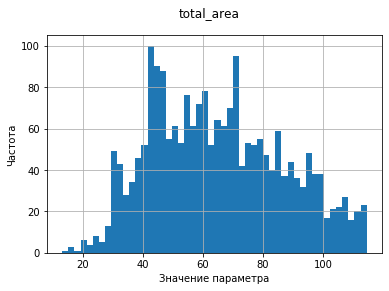

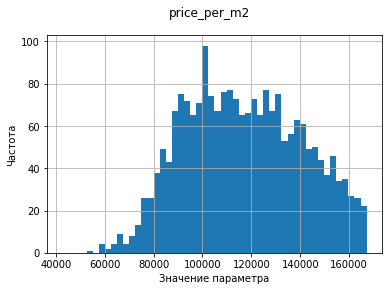

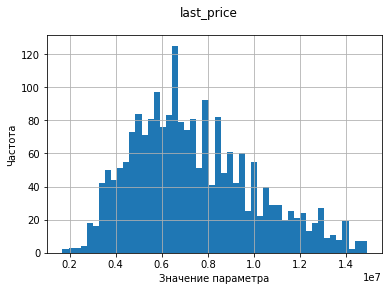

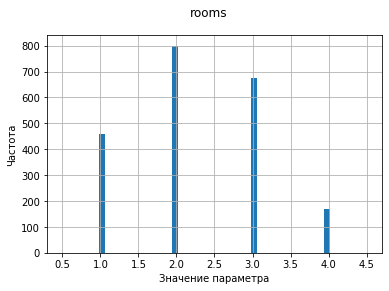

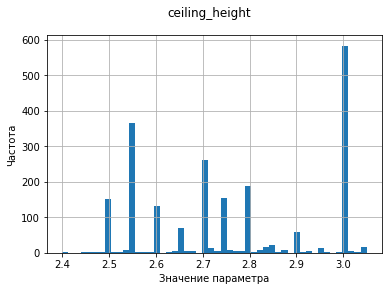

In [75]:
hist_constructor(spb_flats_center)

Проведем такие же построения для данных по всему городу:

Описание данных:


,total_area,price_per_m2,last_price,rooms,ceiling_height
count,"13,127.00","13,127.00","13,127.00","13,127.00","13,127.00"
mean,54.72,"105,247.44","5,739,839.50",1.97,2.66
std,19.28,"21,269.66","2,433,207.72",0.90,0.14
min,13.00,"24,439.00","1,190,000.00",0.00,2.30
25%,40.00,"89,862.00","4,000,000.00",1.00,2.55
50%,50.40,"102,307.00","5,060,000.00",2.00,2.65
75%,65.90,"118,369.00","6,750,000.00",3.00,2.75
max,114.60,"167,224.00","18,000,000.00",6.00,3.05


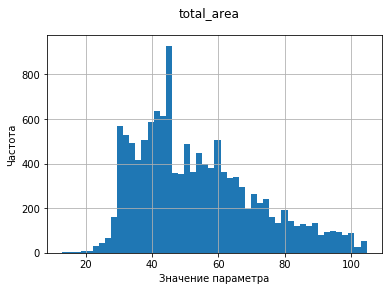

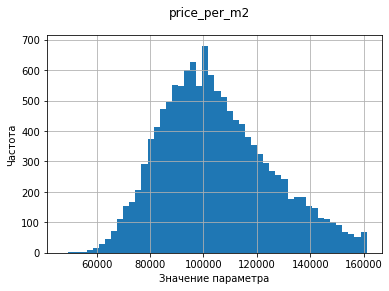

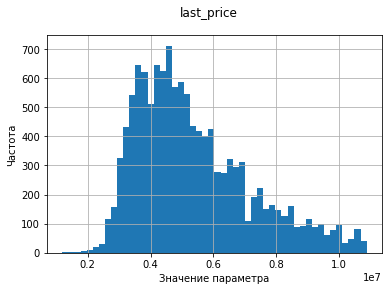

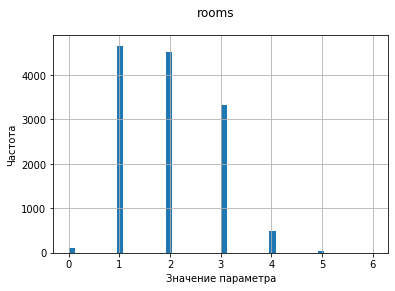

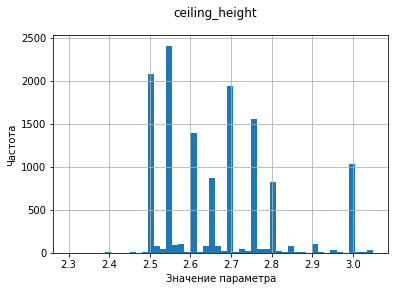

In [76]:
hist_constructor(spb_flats)

#### Сравнивая гистограммы по этим двум срезам, можно сделать следующие выводы:
1. Квартиры в центре города чаще имеют большую площадь;
2. Цены за квадратный метр в среднем выше;
3. Распределение количества комнат примерно одинаковое - всезде преобладают 1-, 2- и 3-комнатные;
4. Высота потолков также находится в похожем диапазоне, большая часть квартир с высокими потолками находится именно в центре города.

Теперь сравним матрицы корреляции для центра и всего города:

In [77]:
data_corr(spb_flats_center)

,price_per_m2,last_price,total_area,rooms,cityCenters_nearest,weekday,month,year
price_per_m2,1.00,0.41,-0.17,-0.35,0.04,0.03,-0.04,0.09
last_price,0.41,1.00,0.81,0.52,-0.14,-0.00,0.01,-0.04
total_area,-0.17,0.81,1.00,0.78,-0.20,-0.02,0.03,-0.10
rooms,-0.35,0.52,0.78,1.00,-0.20,-0.03,0.01,-0.06
cityCenters_nearest,0.04,-0.14,-0.20,-0.20,1.00,0.02,-0.02,0.09
weekday,0.03,-0.00,-0.02,-0.03,0.02,1.00,0.05,0.01
month,-0.04,0.01,0.03,0.01,-0.02,0.05,1.00,-0.23
year,0.09,-0.04,-0.10,-0.06,0.09,0.01,-0.23,1.00


In [78]:
data_corr(spb_flats)

,price_per_m2,last_price,total_area,rooms,cityCenters_nearest,weekday,month,year
price_per_m2,1.00,0.48,-0.05,-0.29,-0.29,0.00,-0.02,0.14
last_price,0.48,1.00,0.84,0.52,-0.30,-0.00,-0.00,0.01
total_area,-0.05,0.84,1.00,0.79,-0.19,-0.00,0.01,-0.07
rooms,-0.29,0.52,0.79,1.00,-0.14,-0.00,-0.00,-0.04
cityCenters_nearest,-0.29,-0.30,-0.19,-0.14,1.00,-0.01,0.00,0.07
weekday,0.00,-0.00,-0.00,-0.00,-0.01,1.00,0.00,-0.00
month,-0.02,-0.00,0.01,-0.00,0.00,0.00,1.00,-0.28
year,0.14,0.01,-0.07,-0.04,0.07,-0.00,-0.28,1.00


В обоих случаях сильная линейная зависимость наблюдается только между ценой квартиры и ее площадью, что вполне логично. Остальные же, как и в случаях по всей Ленинградской области, носят нелинейный характер, который можно проследить с помощью графиков.

На основе функции **plot_constructor**, пропишем новую, которая будет принимать две таблицы и строить для них диаграммы рассеяния для сравнения. 

In [79]:
def spb_compare(data1, data2):
    data1.plot(x='total_area', y='price_per_m2', kind='hexbin', gridsize=30, figsize=(10, 6), sharex=False, grid=True)
    plt.suptitle('Зависимость стоимости за кв.м от площади, Санкт Петербург')
    
    data2.plot(x='total_area', y='price_per_m2', kind='hexbin', gridsize=30, figsize=(10, 6), sharex=False, grid=True)
    plt.suptitle('Зависимость стоимости за кв.м от площади, центр Санкт Петербурга')

    data1.plot(kind='scatter', x='cityCenters_nearest', y='price_per_m2', alpha=0.1)
    plt.suptitle('Зависимость стоимости за кв.м от расстояния до центра, Санкт Петербург')
    
    data2.plot(kind='scatter', x='cityCenters_nearest', y='price_per_m2', alpha=0.1)
    plt.suptitle('Зависимость стоимости за кв.м от расстояния до центра, центр Санкт Петербурга')

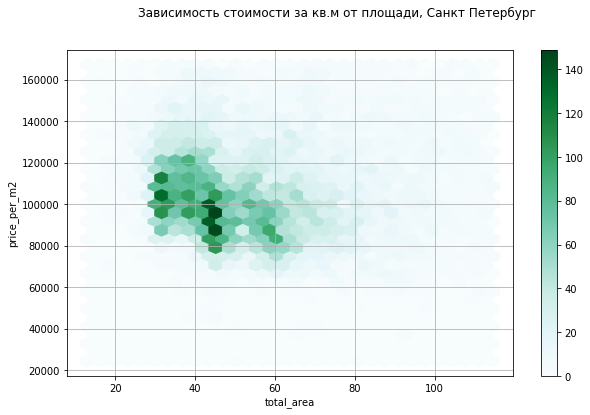

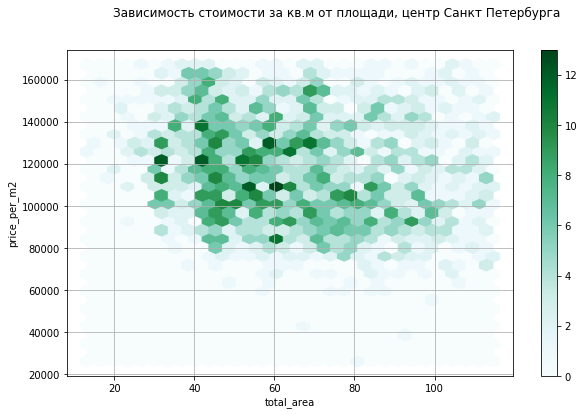

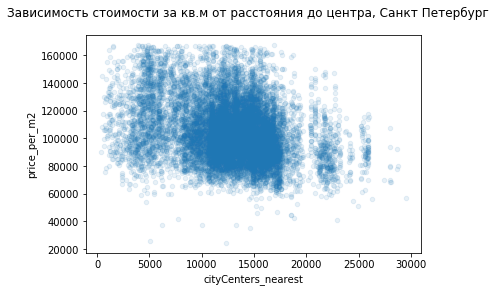

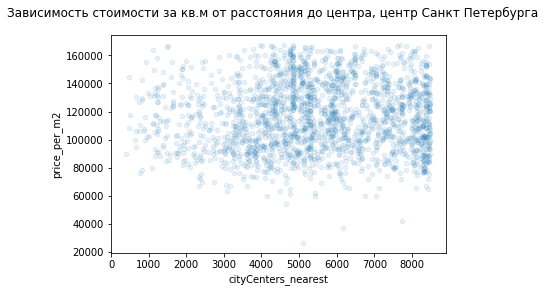

In [80]:
spb_compare(spb_flats, spb_flats_center)

По графикам видно, что:
1. Для центра города снижение стоимости при **увеличении квадратуры** уже не характерно, размах цены везде для всех предложений составляет 80-160 тыс. Для всего города средняя площадь совпадает с этим параметром по всей области (30-60 кв.м).
2. Наибольшее количество предложений наблюдается сразу за чертой **центра города** - от 8 до 18 км. Квартиры на расстоянии менее 3 км встречаются редко.

Чтобы сделать возможным построение графика сразу по двум признакам одной таблицы (центр города и весь Санкт-Петербург), добавим столбец **is_center**, который будет возвращать True или False в зависимости от того, входит ли квартира в 8-километровый радиус.

In [81]:
spb_flats['is_center'] = spb_flats['center_distance'] <= 8

Построим графики по сгруппированным параметрам, используя цикл:

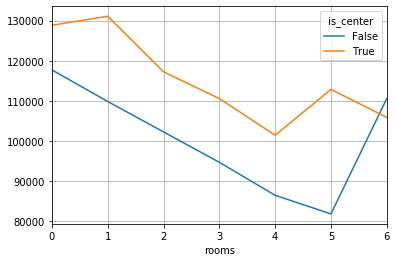

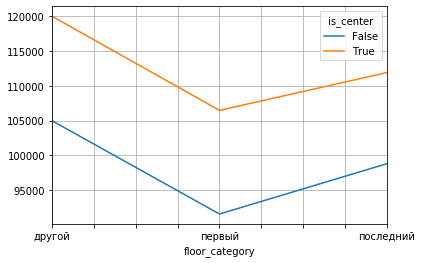

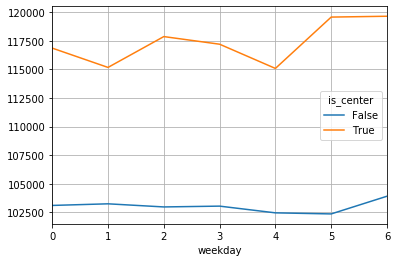

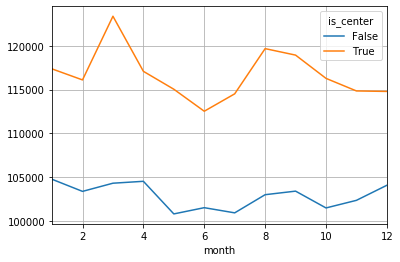

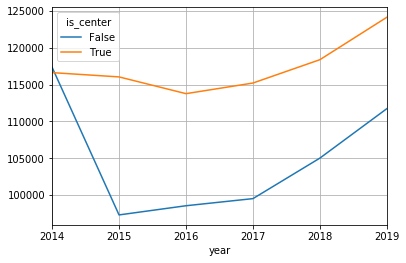

In [82]:
for column in ['rooms', 'floor_category', 'weekday', 'month', 'year']:
    spb_flats.pivot_table(index=column, columns='is_center', values='price_per_m2').plot(grid=True)
    plt.show()

#### Выводы:
1. При увеличении **комнатности** стоимость квадрата снижается и в центре, и по всему городу, однако в первом случае она выше и присутсвует скачок для 5-комнатных квартир;
2. Цена в зависимости от **категории этажа** имеет везде одну и ту же закономерность;
3. Изменчивость цены в зависимости от **дня недели** в обоих случаях небольшая: для всего города она практически не меняется, а для центра колеблется в пределах 5 тыс. за кв.м, пик стоимости - в выходные, самая низкая цена наблюдается во вторник и пятницу. Июнь остается лидером по дешевизне в зависимости от **месяца** для центра города, по всему же городу одинаково низкая цена наблюдается с мая по июль. Квартиры в центре города начали дорожать на **год** позже, чем по всему городу, при этом с 2014 по 2015 в городе наблюдалось резкое снижение цены - со 117 она упала до значения меньше 100 тыс. После 2016 она стабильно увеличивается.

## 5. Общий вывод <a id='conclusion'></a>
[Назад к оглавлению](#content)

Таким образом мы провели исследовательский анализ данных и научились определять рыночную стоимость объектов недвижимости. Мы установили параметры, которые позволят построить автоматизированную систему для отслеживания аномалий и мошеннической деятельности.  
Для проведения этой работы в нашем распоряжении были данные по более чем 23000 объектам недвижимости, включающие в себя различные параметры квартир. При их изучении обнаружилось немало пропусков, ввиду которых проводить дальнейшие исследования не представляллось возможным. Для предобработки данных мы использовали следующие виды заполнения:
- высоту потолков обработали медианными значениями, характерными для каждого типа домов, так как застройки, в основном, типовые;
- для числа балконов было логично предположить, что незаполнение означает его отсутствие;
- для жилой площади и площади кухни обнаружили линейную зависимость от количества комнат, поэтому медианное значение по этому параметру оказалось наиболее подходящим;
- так же медиана использовалась для расстояния до центра города и аэропорта в зависимости от населеного пункта, исходя из того, что и центр, и аэропорт находятся практически в середине Ленинградской области.

Количество дней с момента публикации объявления было решено оставить незаполненными, чтобы избежать искажений. Картографические данные, такие как количесто парков и водоемов и расстояние до них, для нашей задачи не имели практической значимости, поэтому остались также без обработки. После этого данные были переведены в следующие типы:
- цена, количество этажей, балконов, расстояния до центра и аэропорта в целочисленный;
- дата публикации - из строкового в datetime;
- информация об апартаментах в логический.

После предобработки для проведения дальнейших исследований в таблицу были добавлены несколько новых параметров:
1. Цена квадратного метра.
2. День недели, месяц и год публикации объявления.
3. Категория этажа квартиры: первый, последний либо другой.
4. Соотношения жилой площади и площади кухни к общей.

На следующем шаге мы проводили исследовательский анализ. Здесь с помощью гистограмм были изучены такие параметры, как площадь,цена, количество комнат и высота потолков. По результатам исследования выяснили, что:
- наибольшее число квартир в выборке имеют площадь от 30 до 60 кв.м;
- пик значений цены за квадратный метр приходится на 80-110 тыс. (около 10000 квартир);
- общая стоимость в основном составляет 3-6 млн;
- количество комнат в продаваемых квартирах как правило 1, 2 или 3, они составляют около 90% всех предложений;
- высота потолков чаще всего колеблется от 2.5 до 2.8 м, так же встречается немало квартир с потолками в 3 м.

Диаграмма для времени с момента публикации объявления до его снятия показала, что в средней квартиры продаются за 1-3 месяца. Среди объявлений встречаются продажи за несколько дней, которые мы считаем аномально быстрыми. Продажи, которые выходят за пределы "усов" диаграммы размаха, - более 500 дней - мы обозначили как очень долгие.  
Для проведения более качественного анализа требовалось убрать из исходной таблицы редкие и выбивающиеся значения интересующих нас параметров. Для этого мы написали функцию, которая автоматически делала срез данных по полуторному межквартельному размаху, исключая выбросы. После ее применения таблица сократилась на 17% и появилась возможность построения информативных графиков.  
Чтобы последить как цена зависит от интересующих нас параметров была построена матрица корреляции, которая в достаточной мере не показала сильных зависимостей. Нами было предположено, что это вызвано не их отсутствием, а нелинейным характером зависимостей. Чтобы в этом убедиться, мы посмтроили диаграммы рассеяния для общей площади и расстояния до центра и графики для количества комнат, категории этажа, дня недели, месяца и года публикации. После их изучения мы выявили, что:
- цена квадратного метра снижается при увеличении стоимости квартиры;
- цена квадратного метра снижается при увеличении числа  комнат, однако возрастает при 6-и, что и дает нелинейность;
- первый и последний этажи имеют более низкую стоимость по сравнению с остальными;
- объявления, выставленные в субботу имеют более низкую цену, а во вторник, среду и воскресенье - высокую;
- минимальная цена в июне, пик приходится на апрель и август;
- до 2016 года средняя цена снижалась, однако после с каждым годом линейно возврастет.

Далее нами было выделено 10 населенных пунктов с наибольшим количеством объявлений. В них вошли Санкт-Петербург, Мурино, Шушары, Всеволожск, Пушкин, Парголово, Колпино, Кудрово, Гатчина и Выборг. Столица области, ожидаемо, имеет самую высокую среднюю стоимость квадратного метра, Выборг же самую низкую из всех представленных.  
Для сравнения квартир внутри Санкт-Петербурга мы выделили те квартиры, которые находятся в центре - график зависимости стоимости от километража показал, что такой границей является область в радиусе 8 км. При сравнительном анализе города и его центра мы сделали следующие выводы:
- в центре города, как правило, продаются квартиры с большей площадью;
- цена за квадратный метр в центре ожидаемо выше;
- 1-, 2- и 3-комнкатные квартиры преобладают в обоих случаях;
- в центре города чаще встречаются квартиры с высокими потолками, однако в средней распределение похожее.

Матрица корреляции, как и в слечае со всей Ленинградской областью, не показала линейных зависимостей для Питера и его центра. При сравнении диаграмм рассеяния мы выявили, что для центра города уже не характерно снижение цены при увеличении площади жилья, в то время как в остальном городе такая тенденция продолжает сохраняться. Большинство выставленных объявлений находятся на расстоянии 8-18 км от центра, а на дисстанции менее 3 км предложения довольно редки. При сравнении графиков зависимостей выводы оказались следующие:
- чем больше комнат, тем ниже стоимость - в обоих случаях;
- правило первого и последнего этажа также везде сохраняется;
- цена в городе и его центре менее чувствительна ко дню публикации объявления;
- июнь остается лидером по дешевизне квартир, для всего города такой же низкий уровень сохраняется в мае и июле;
- с 2016 так же квартиры стабильно дорожают, с 2014 по 2015 для центра города наблюдалось резкое снижение.